# This notebook demonstrates Rikai's visualization toolsets

In [26]:
from rikai.types import Image, Box2d, Mask
from rikai.io import open_uri
from pycocotools.coco import COCO
from tempfile import NamedTemporaryFile
from pathlib import Path

In [2]:
ANNOTATION_FILE = "s3://eto-public/coco/annotations/instances_val2017.json"
TMP_ANNO_FILE = Path("/tmp/coco.json")
if not TMP_ANNO_FILE.exists():
    with TMP_ANNO_FILE.open("w") as anno_file, open_uri(ANNOTATION_FILE) as cloud_anno:
        anno_file.write(cloud_anno.read().decode("utf-8"))
        anno_file.flush()

coco = COCO(TMP_ANNO_FILE)

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!


In [3]:
image_metadata = next(iter(coco.imgs.values()))
image_metadata


{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [4]:
img = Image(image_metadata["coco_url"])
img

Image(uri=http://images.cocodataset.org/val2017/000000397133.jpg)

In [27]:
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_metadata["id"]))

In [25]:
boxes = [Box2d.from_top_left(*ann["bbox"]) for ann in annotations]
height, width = image_metadata["height"], image_metadata["width"]
segmentations = [Mask.from_polygon(ann["segmentation"], height=height, width=width) 
            if ann["iscrowd"] == 0 
            else Mask.from_coco_rle(ann["segmentation"]["counts"], height=height, width=width) 
            for ann in annotations]
labels = [coco.loadCats(ids=ann["category_id"])[0]["name"] for ann in annotations]

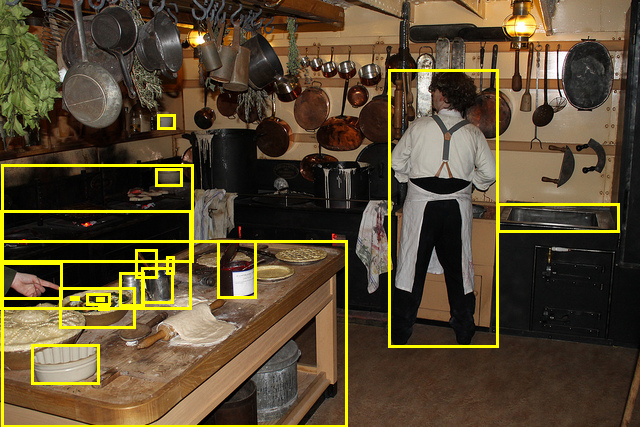

In [7]:
from functools import reduce

from rikai.viz import Style

box_style = Style(color="yellow", width=3)

reduce(lambda a, b: a | box_style(b), [img] + boxes)

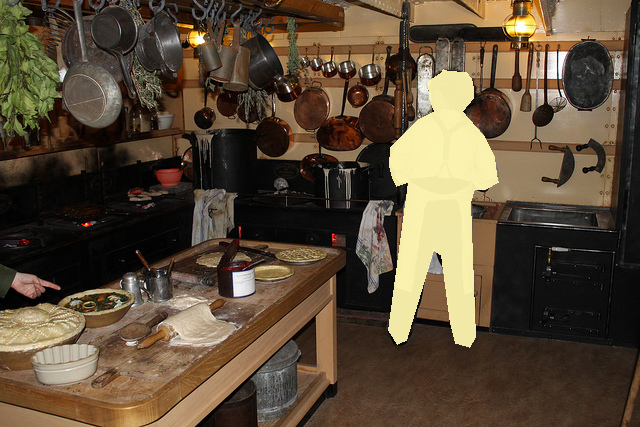

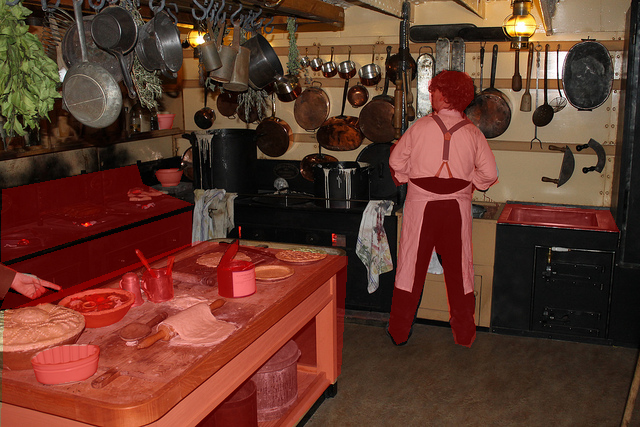

In [24]:
display(img | segmentations[2]@{"color": "#FFF6B0"} | segmentations[10])

display(reduce(lambda x, y: x | y, [img] + segmentations))